<a href="https://colab.research.google.com/github/shravankumar9892/tokenization/blob/master/diseaseprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
!pip --version

pip 19.1.1 from /usr/local/lib/python3.6/dist-packages/pip (python 3.6)


In [0]:
!pip install -q tensorflow-gpu==2.0.0-beta1

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import TweetTokenizer

In [0]:
(train_data, train_label), (test_data, test_label) = keras.datasets.imdb.load_data(num_words=2000)

In [0]:
word_index = keras.datasets.imdb.get_word_index()

word_index = {k:v+3 for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

reversed_word_index = {v:k for k, v in word_index.items()}

In [0]:
vocab_size=10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [0]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=word_index["<PAD>"], maxlen=256, dtype='int32', padding='post')
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index["<PAD>"], maxlen=256, dtype='int32', padding='post')

In [188]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
x_val = train_data[:10000]
x = train_data[10000:]
y_val = train_label[:10000]
y = train_label[10000:]

In [190]:
history = model.fit(x, y, epochs=30, batch_size=1024, validation_data=[x_val, y_val], verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/30
15000/15000 [==============================] - 1s 65us/sample - loss: 0.6927 - acc: 0.5244 - val_loss: 0.6920 - val_acc: 0.5466
Epoch 2/30
15000/15000 [==============================] - 1s 55us/sample - loss: 0.6909 - acc: 0.6211 - val_loss: 0.6899 - val_acc: 0.6574
Epoch 3/30
15000/15000 [==============================] - 1s 51us/sample - loss: 0.6881 - acc: 0.6907 - val_loss: 0.6867 - val_acc: 0.6988
Epoch 4/30
15000/15000 [==============================] - 1s 52us/sample - loss: 0.6840 - acc: 0.6971 - val_loss: 0.6820 - val_acc: 0.7068
Epoch 5/30
15000/15000 [==============================] - 1s 52us/sample - loss: 0.6779 - acc: 0.7236 - val_loss: 0.6753 - val_acc: 0.7093
Epoch 6/30
15000/15000 [==============================] - 1s 51us/sample - loss: 0.6696 - acc: 0.7240 - val_loss: 0.6663 - val_acc: 0.7194
Epoch 7/30
15000/15000 [==============================] - 1s 53us/sample - loss: 0.6587 - acc: 0.7339 - val_loss: 0.

In [191]:
history_dic = history.history
history_dic.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

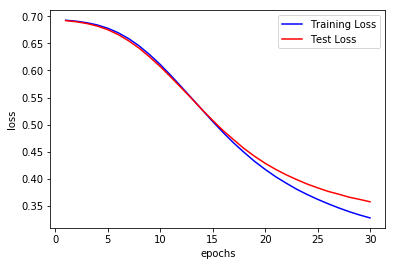

In [192]:
%matplotlib inline
plt.clf()

epochs = range(1, len(history_dic["acc"])+1)

plt.plot(epochs, history_dic["loss"], 'b', label='Training Loss')
plt.plot(epochs, history_dic["val_loss"], 'r', label='Test Loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [193]:
results = model.evaluate(test_data, test_label)

25000/25000 [==============================] - 1s 39us/sample - loss: 0.3560 - acc: 0.8525


In [194]:
print("% Accuracy on test data:", results[1]*100)

% Accuracy on test data: 85.24799942970276


In [0]:
tknzr = TweetTokenizer()

def encode_review(tokenized_text):
    nums = np.array([word_index.get(word) for word in tokenized_text])
    for i in range(nums.shape[0]):
        if nums[i]:
            continue
        else:
            nums[i] = 2
    return nums

In [196]:
#@title Add movie review (Kabir Singh) { run: "auto", vertical-output: true, display-mode: "form" }
review = "The movie was awesome" #@param {type:"string"}
tokenized_review = tknzr.tokenize(review)
review = encode_review(tokenized_text=tokenized_review)
padded_review = np.pad(review, (1,255-review.shape[0]), 'constant', constant_values=(1,0))
padded_review = np.expand_dims(padded_review, axis=0)

predictions = model.predict(padded_review)
if predictions[0][0] > 0.5:
    print("That is a positive review")
else:
    print("That is a negative review")

That is a positive review
